In [1]:
!pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from colorama import Fore, Style


In [2]:
import mysql.connector


In [3]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',   
    password='admin',  
    database='gdb0041'  
)

# Create a cursor object
cursor = conn.cursor()

# All Markets

In [4]:
query = "SELECT distinct(market) as market FROM dim_customer"

cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)


('India',)
('Indonesia',)
('Japan',)
('Pakistan',)
('Philiphines',)
('South Korea',)
('Australia',)
('Newzealand',)
('Bangladesh',)
('France',)
('Germany',)
('Italy',)
('Netherlands',)
('Norway',)
('Poland',)
('Portugal',)
('Spain',)
('Sweden',)
('Austria',)
('United Kingdom',)
('USA',)
('Canada',)
('Mexico',)
('Brazil',)
('China',)
('Chile',)
('Columbia',)


# All Customers


In [10]:
query = "SELECT distinct(customer) as market FROM dim_customer"

cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

('Atliq Exclusive',)
('Atliq e Store',)
('Neptune',)
('Synthetic',)
('Novus',)
('Sage',)
('Leader',)
('Zone',)
('Taobao',)
('Reliance Digital',)
('Croma',)
('Ezone',)
('Vijay Sales',)
('Lotus',)
('Viveks',)
('Girias',)
('Amazon',)
('Flipkart',)
('Ebay',)
('Electricalsocity',)
('Electricalslytical',)
('Expression',)
('Propel',)
('Acclaimed Stores',)
('Info Stores',)
('Flawless Stores',)
('Electricalsbea Stores',)
('All-Out',)
('Surface Stores',)
('Nomad Stores',)
('Insight',)
('Digimarket',)
('Forward Stores',)
('Sound',)
('Epic Stores',)
('Logic Stores',)
('Path',)
('Control',)
('Elite',)
('Chip 7',)
('Elkjøp',)
('UniEuro',)
('Media Markt',)
('Sorefoz',)
('Otto',)
('Notebillig',)
('Billa',)
('Saturn',)
('Expert',)
('Currys (Dixons Carphone)',)
('Fnac-Darty',)
('Unity Stores',)
('Euronics',)
("Argos (Sainsbury's)",)
('Coolblue',)
('Boulanger',)
('Radio Popular',)
('Electricalslance Stores',)
('Mbit',)
('Chiptec',)
('Electricalsara Stores',)
('Power',)
('Premium Stores',)
('Integration S

# Find Top Product By Division Wise Based On Quantity Sold

Enter year : 2021
Enter number how many you want display top : 2


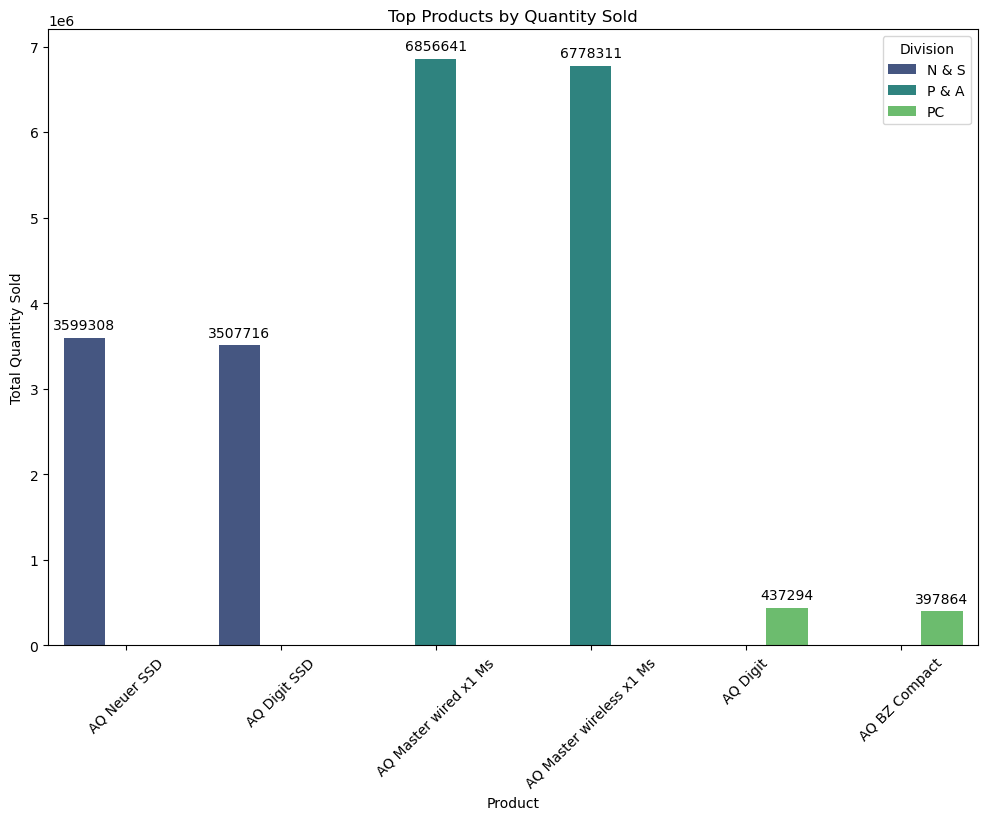

In [23]:
year = input("Enter year : ")
top_n = input("Enter number how many you want display top : ")

procedure_name = 'get_top_product_qty_sold'
parameters = (year,top_n)  # Example parameter: employee ID 1
cursor.callproc(procedure_name, parameters)

results = []
for result in cursor.stored_results():
    results = result.fetchall()



# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Division', 'Product', 'Total_Qty', 'Drnk'])  # Adjust column names as per your table

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Product', y="Total_Qty",hue='Division', data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top Products by Quantity Sold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


# Find Top Product based on Net Sale


Enter Market : usa
Enter Fiscal year : 2021
Enter number how many you want display top : 5


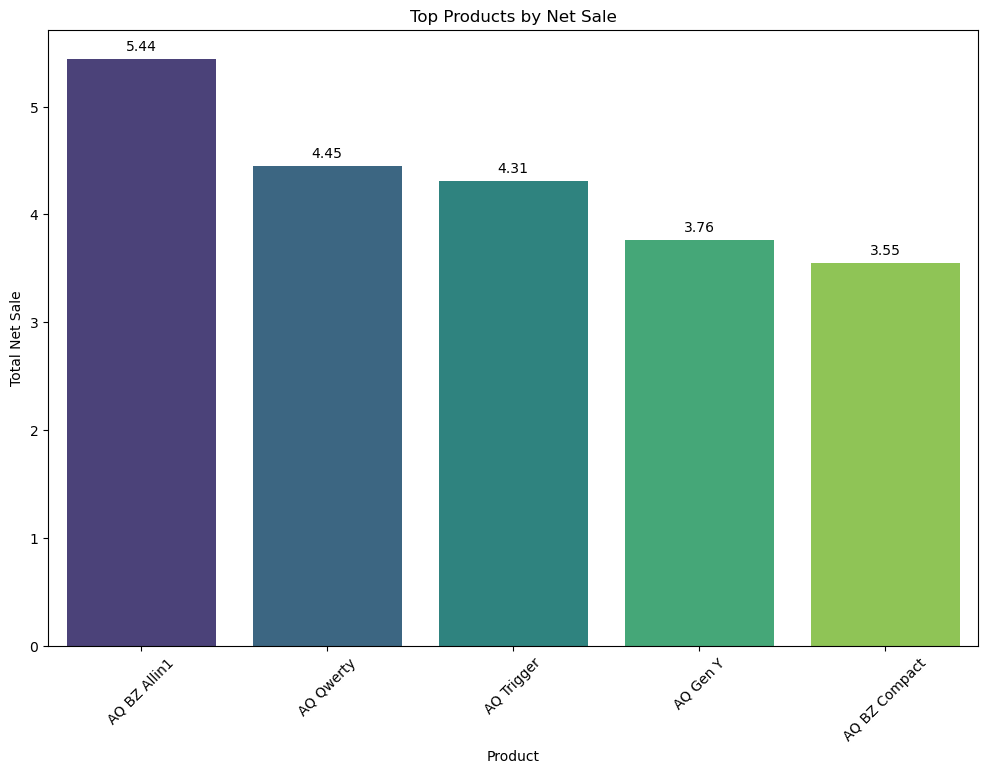

In [10]:
market = input("Enter Market : ")
f_year = input("Enter Fiscal year : ")
top_n = input("Enter number how many you want display top : ")

procedure_name = 'get_top_product_sale'
parameters = (market,f_year,top_n)  # Example parameter: employee ID 1
cursor.callproc(procedure_name, parameters)

results = []
for result in cursor.stored_results():
    results = result.fetchall()



# Create a DataFrame from the results
df = pd.DataFrame(results, columns=[ 'Product', 'Net Sale(Million)'])  # Adjust column names as per your table

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Product', y="Net Sale(Million)", data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Total Net Sale')
plt.title('Top Products by Net Sale')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


# Find Top Customers based on Net Sale

Enter Market : usa
Enter Fiscal year : 2020
Enter number how many you want display top : 5


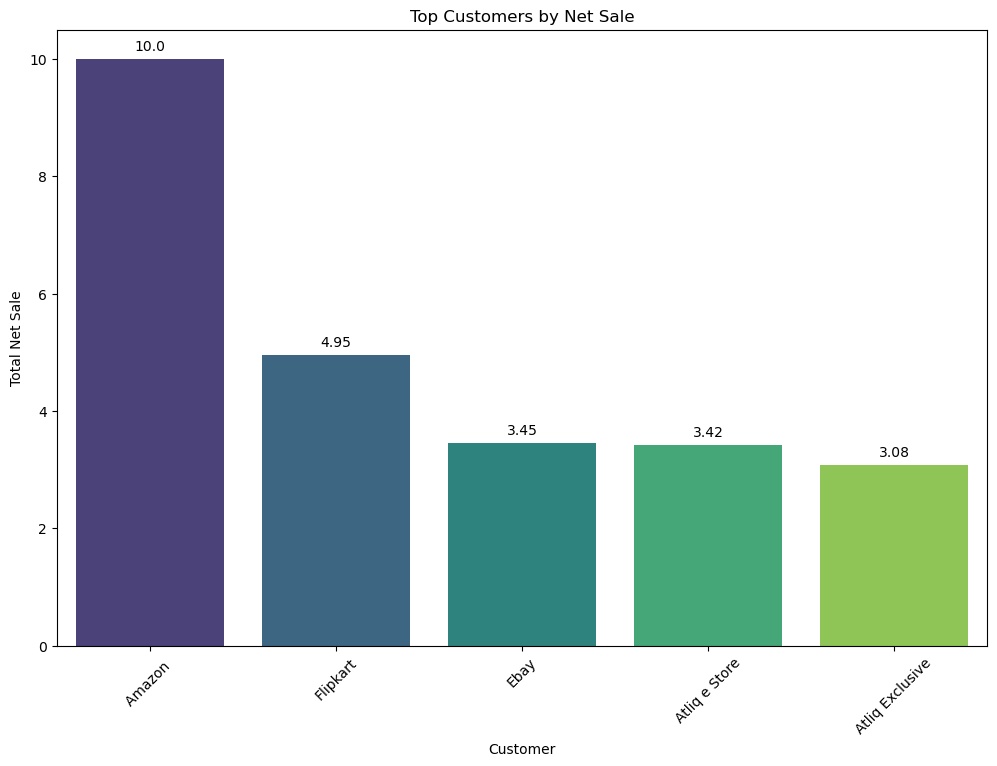

In [11]:
market = input("Enter Market : ")
f_year = input("Enter Fiscal year : ")
top_n = input("Enter number how many you want display top : ")

procedure_name = 'get_top_customers_by_net_sales'
parameters = (market,f_year,top_n)  # Example parameter: employee ID 1
cursor.callproc(procedure_name, parameters)

results = []
for result in cursor.stored_results():
    results = result.fetchall()



# Create a DataFrame from the results
df = pd.DataFrame(results, columns=[ 'Customer', 'Net Sale(Million)'])  # Adjust column names as per your table

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Customer', y="Net Sale(Million)", data=df, palette='viridis')

# Adding labels and title
plt.xlabel('Customer')
plt.ylabel('Total Net Sale (mln)')
plt.title('Top Customers by Net Sale')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


In [9]:

customer = input("Enter Customer Name : ")


procedure_name = 'get_monthly_gross_sale_customer'
parameters = (customer,)  
cursor.callproc(procedure_name, parameters)

results = []
for result in cursor.stored_results():
    results = result.fetchall()



df = pd.DataFrame(results, columns=['Date', 'Monthly Sales']) 




print(tabulate(df, headers='keys', tablefmt='psql'))


Enter Customer Name : Amazon
+----+------------+------------------+
|    | Date       |    Monthly Sales |
|----+------------+------------------|
|  0 | 2017-09-01 | 128811           |
|  1 | 2017-10-01 | 433048           |
|  2 | 2017-11-01 | 566549           |
|  3 | 2017-12-01 | 396534           |
|  4 | 2018-01-01 | 128205           |
|  5 | 2018-02-01 | 299901           |
|  6 | 2018-03-01 | 357226           |
|  7 | 2018-04-01 | 252857           |
|  8 | 2018-05-01 | 121278           |
|  9 | 2018-06-01 | 328818           |
| 10 | 2018-07-01 | 326094           |
| 11 | 2018-08-01 | 233400           |
| 12 | 2018-09-01 | 477299           |
| 13 | 2018-10-01 |      1.25438e+06 |
| 14 | 2018-11-01 |      1.79419e+06 |
| 15 | 2018-12-01 |      1.29199e+06 |
| 16 | 2019-01-01 | 455509           |
| 17 | 2019-02-01 | 888777           |
| 18 | 2019-03-01 |      1.053e+06   |
| 19 | 2019-04-01 | 719102           |
| 20 | 2019-05-01 | 484378           |
| 21 | 2019-06-01 | 904176         